# ART calculations for `Ebola` virus (Ebola + Zaire Ebola)

In [1]:
import sys
import os

# Completely suppress stderr output
sys.stderr = open(os.devnull, 'w')

# Now import everything
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
sys.path.append('.')   # Add local directory to access some of the functions
sys.path.append('../../') # Make sure this is the location for the ART library

import warning_utils
warning_utils.filter_end_user_warnings()

Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released Thursday July 03, 2025.
Exception ignored in: <function ResourceTracker.__del__ at 0xffff903456c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/usr/local/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, omegas]
Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 18 seconds.
We recommend running at least 4 chains for

In [2]:
import pandas as pd
import numpy as np

from art.core import RecommendationEngine
import art.utility as utils
import pickle
import cloudpickle
import matplotlib.pyplot as plt

### Define directories

In [16]:
dataDir = '/code/DTRA_ART/DrugDesignData/'
modelBuildingDataDir = os.path.join(dataDir, 'modelBuildingData/')
resultsDir = os.path.join(dataDir, 'Results/')
artResultDir = resultsDir + 'ART_results/Ebola_bestMACAW/'
os.makedirs(artResultDir, exist_ok=True)
saveDir = os.path.join(resultsDir, "combinedEbolaVirus_bestMACAW/")
os.makedirs(saveDir, exist_ok=True)

### Extract the data for `Ebola` into a data frame with `duplicate` SMILES

In [4]:
combinedEbolaVirusData_chEMBL_wMACAW = pd.read_csv(modelBuildingDataDir + "combinedEbolaVirusData_chEMBL_wMACAW.csv")
combinedEbolaVirusData_chEMBL_wMACAW 

,ID,compound_id,Smiles,pPotency,StrainClassifier,pPotency_category,MACAW_1,MACAW_2,MACAW_3,MACAW_4,...,MACAW_36,MACAW_37,MACAW_38,MACAW_39,MACAW_40,MACAW_41,MACAW_42,MACAW_43,MACAW_44,MACAW_45
0,1,CHEMBL3596788,COc1nc(N)ncc1-c1cn(COCCO)cn1,4.000000,Ebola,3-10,-0.155799,0.100680,-0.079909,-0.083511,...,-0.103393,0.052756,-0.118024,0.047018,-0.066348,0.062763,-0.001517,0.004310,-0.074425,0.052566
1,2,CHEMBL3753489,Nc1nccc2c1ncn2C1=C[C@@H](CO)[C@H](O)[C@@H]1O,6.494850,Ebola,3-10,-0.209969,0.129295,-0.164288,-0.338243,...,-0.026157,-0.005031,0.027444,-0.038592,-0.007418,-0.026327,-0.020674,-0.016634,0.000777,-0.033889
2,3,CHEMBL4751715,CCOP(=O)(Cc1cccc(COc2ccccc2OC2CCN(Cc3ccc4nc(-c...,5.725842,Ebola,3-10,0.037223,-0.153233,-0.128684,0.091339,...,0.137010,-0.091897,-0.023014,-0.007234,-0.097196,0.034869,-0.064372,0.056583,-0.035275,0.030782
3,4,CHEMBL4792617,CCOP(=O)(Cc1cccc(COc2ccccc2OC2CCN(Cc3ccc4nc(-c...,5.603801,Ebola,3-10,0.060366,-0.151656,-0.150364,0.081810,...,0.130298,-0.094831,-0.032124,0.001538,-0.091877,0.056564,-0.055182,0.049684,-0.025770,0.007204
4,5,CHEMBL5085366,CCCCCCCCCCCCCCCC(=O)O[C@H]1[C@@H](O)[C@](C#N)(...,4.301030,Ebola,3-10,0.143305,-0.180393,-0.332401,0.050678,...,-0.042295,-0.033267,0.064601,0.007985,0.198736,0.045941,0.005515,-0.004678,0.017143,0.008675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,833,CHEMBL5398314,O=C(CCNCCC1CCN(Cc2ccccc2)CC1)Nn1c2ccccc2c2ccccc21,6.283997,ZaireEbola,3-10,-0.014489,-0.068218,0.095152,-0.003439,...,0.076392,-0.023350,-0.035052,-0.156599,0.022538,0.010543,0.018904,-0.041162,0.024341,-0.094921
833,834,CHEMBL5398314,O=C(CCNCCC1CCN(Cc2ccccc2)CC1)Nn1c2ccccc2c2ccccc21,6.283997,ZaireEbola,3-10,-0.014489,-0.068218,0.095152,-0.003439,...,0.076392,-0.023350,-0.035052,-0.156599,0.022538,0.010543,0.018904,-0.041162,0.024341,-0.094921
834,835,CHEMBL5424177,O=C(CNCCC1CCN(Cc2ccccc2)CC1)NN(c1ccccc1)c1ccccc1,5.721246,ZaireEbola,3-10,-0.051943,-0.047731,0.119812,-0.003074,...,0.014107,0.010088,0.002799,0.006969,0.049721,0.009212,0.095221,0.040091,-0.017353,0.011744
835,836,CHEMBL5424177,O=C(CNCCC1CCN(Cc2ccccc2)CC1)NN(c1ccccc1)c1ccccc1,5.721246,ZaireEbola,3-10,-0.051943,-0.047731,0.119812,-0.003074,...,0.014107,0.010088,0.002799,0.006969,0.049721,0.009212,0.095221,0.040091,-0.017353,0.011744


### Prepare data to run `ART` on `Ebola` data with `duplicate` SMILES

#### Find Features and Response

In [5]:
input_var = [col for col in combinedEbolaVirusData_chEMBL_wMACAW.columns if col.startswith('MACAW_')]
print(f"MACAW Embeddings: {len(input_var)}")
print(input_var)

MACAW Embeddings: 45
['MACAW_1', 'MACAW_2', 'MACAW_3', 'MACAW_4', 'MACAW_5', 'MACAW_6', 'MACAW_7', 'MACAW_8', 'MACAW_9', 'MACAW_10', 'MACAW_11', 'MACAW_12', 'MACAW_13', 'MACAW_14', 'MACAW_15', 'MACAW_16', 'MACAW_17', 'MACAW_18', 'MACAW_19', 'MACAW_20', 'MACAW_21', 'MACAW_22', 'MACAW_23', 'MACAW_24', 'MACAW_25', 'MACAW_26', 'MACAW_27', 'MACAW_28', 'MACAW_29', 'MACAW_30', 'MACAW_31', 'MACAW_32', 'MACAW_33', 'MACAW_34', 'MACAW_35', 'MACAW_36', 'MACAW_37', 'MACAW_38', 'MACAW_39', 'MACAW_40', 'MACAW_41', 'MACAW_42', 'MACAW_43', 'MACAW_44', 'MACAW_45']


In [6]:
features = combinedEbolaVirusData_chEMBL_wMACAW[input_var].to_numpy()

In [7]:
response_var = ["pPotency"]
print(response_var)

['pPotency']


In [8]:
response = combinedEbolaVirusData_chEMBL_wMACAW[response_var].to_numpy()

### save the data as a EDD style file

In [9]:
utils.save_edd_csv(features, response, input_var, modelBuildingDataDir + 'combinedEbolaVirusData_chEMBL_wMACAW_ARTready.csv', response_var)

### Predict response with ART

In [10]:
combinedEbolaVirusData_chEMBL_wMACAW_ARTready = pd.read_csv(modelBuildingDataDir + "combinedEbolaVirusData_chEMBL_wMACAW_ARTready.csv")
combinedEbolaVirusData_chEMBL_wMACAW_ARTready

,Line Name,Type,0.0
0,0,MACAW_1,-0.155799
1,1,MACAW_1,-0.209969
2,2,MACAW_1,0.037223
3,3,MACAW_1,0.060366
4,4,MACAW_1,0.143305
...,...,...,...
38497,832,pPotency,6.283997
38498,833,pPotency,6.283997
38499,834,pPotency,5.721246
38500,835,pPotency,5.721246


### Define the ART parameters needed for the prediction

In [11]:
art_params = {
    'input_vars': input_var,
    'response_vars': response_var,
    'objective': 'maximize',
    'threshold': 0.2,
    'alpha': 0.5,
    'num_recommendations': 10,
    'max_mcmc_cores': 4,
    'seed': 42,                    
    'output_dir': artResultDir,
    'recommend': False,
    'cross_val': True,
    'num_tpot_models': 2,
}

### Run ART without recommendations but with cross-validations to gauge how generalizable the results are

ART identified 837 unique designs in the training data. 
Correctly communicating your designs is critical to building ART's model and to cross-validation.  We strongly suggest verifying ART's interpretation of your designs by inspecting the preprocessed DataFrame.  For example, if your ART instance is named `engine`, run `engine.df["Design"]`.  See Data Preparation docs for a description of how ART infers design information. https://lbl-biosci.gitlab.io/ese/art/Data_Preparation/#labeling-lines-designs-replicates-oh-my
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressoris_regressor

is_classifier
is_regressor
is_classifier
is_classifier
is_regressor
is_regressor
is_regressor
is_classifier
is_classifier
is_regressoris_classifier

is_classifier
is_regressor
is_regressor
is_regressor
is_classifier
is_classifier
is_regressor
is_classifier
is_classifier
is_regressor
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_

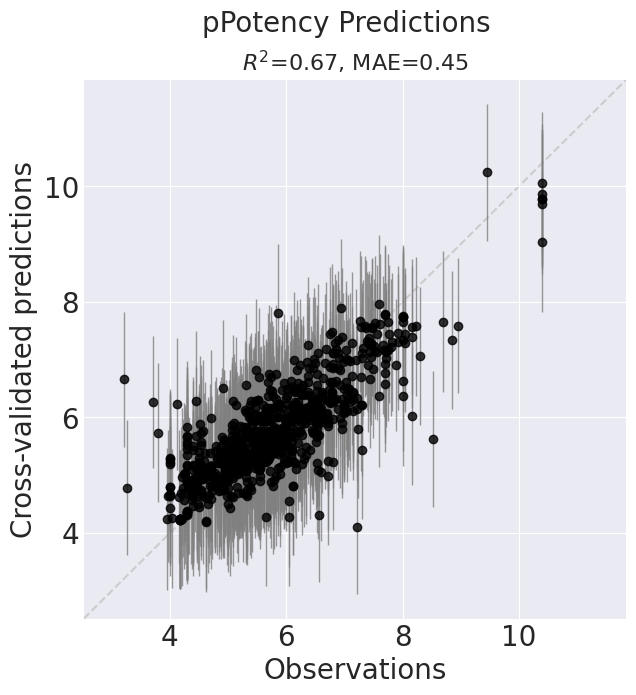

is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
i

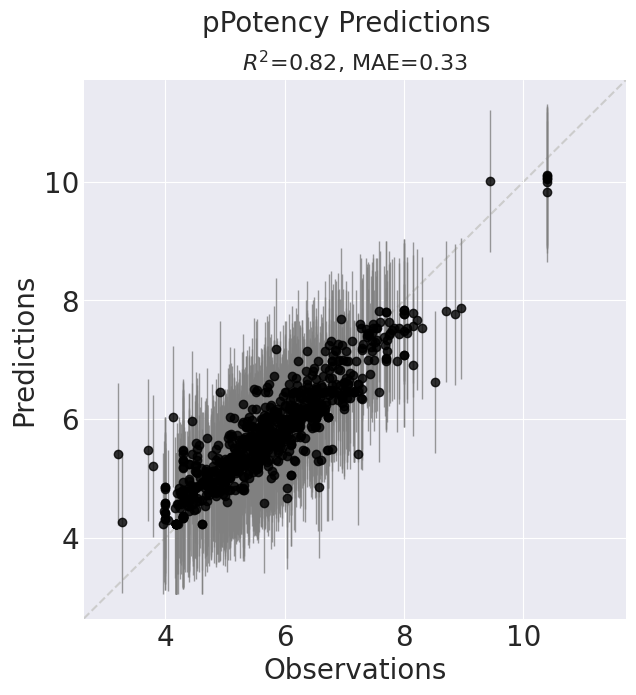

CPU times: user 37min 18s, sys: 11 s, total: 37min 29s
Wall time: 4h 18min 58s


In [12]:
%%time

art = RecommendationEngine(df=combinedEbolaVirusData_chEMBL_wMACAW_ARTready, **art_params)

In [17]:
import shap
import matplotlib.pyplot as plt

### Find SHAP values

We will now find which input features are more important by using SHAP analysis. First, lets initialize the library:

In [18]:
shap.initjs()

In [ ]:
plt.style.use('default')

define a wrapper function that provides the ART prediction given and input X, for use by the SHAP library

In [ ]:
def f(X):
    return art.predict(X)

convert the ART input data into the pandas dataframe that the SHAP library favors

In [ ]:
X_df = pd.DataFrame(data=art.X, columns=art_params['input_vars'])

create and execute the explainer for the features values

In [ ]:
explainer_e   = shap.Explainer(f, X_df)
shap_values_e = explainer_e(X_df)

In [ ]:
shap.summary_plot(shap_values_e)

In [ ]:
shap.plots.heatmap(shap_values_e, instance_order=shap_values_e.sum(1), max_display=15)


### Load pre-trained ART model (if necessary, otherwise skip this step)

In [17]:
ARTtrainedModelFile = os.path.join(artResultDir, 'art.cpkl')
with open(ARTtrainedModelFile, 'rb') as f:
    art = cloudpickle.load(f)
print(f" ART model loaded from: {ARTtrainedModelFile}")

 ART model loaded from: /code/DTRA_ART/DrugDesignData/Results/ART_results/Ebola/art.cpkl


### Load MACAW transformer (not required at this moment)

## 2.1 Discovery of new hits specific to all viruses (data source Enamine_antiviralsData.csv)

In this section, we screen a custom virtual library looking for molecules that are promising accoring to the the SVR models `regr` above, which use 15-D MACAW embeddings as their input. The custom library ("Enamine_antiviralsData.csv") compiled from commercial catalogs by Enamine. In particular, we are interested in molecules with high predicted pPotency.

Load MACAW embeedings for external validation data set

In [13]:
combinedEbolaVirus_EnamineDatasets_wMACAW = pd.read_csv(saveDir + "/combinedEbolaVirus_EnamineDatasets_wMACAW.csv")
combinedEbolaVirus_EnamineDatasets_wMACAW

,SMILES,MACAW_1,MACAW_2,MACAW_3,MACAW_4,MACAW_5,MACAW_6,MACAW_7,MACAW_8,MACAW_9,MACAW_10,MACAW_11,MACAW_12,MACAW_13,MACAW_14,MACAW_15
0,COCC(C)NC(=O)NC1=NN=C(S1)C2CC2,0.082020,-0.100465,0.143736,0.012740,0.010961,0.034782,0.041563,-0.032900,-0.020971,-0.000958,0.031229,0.015966,0.041176,-0.002662,0.016790
1,CN1C(=O)C=CN(CC(=O)NCC2CC2)C1=O,0.110920,-0.062487,0.108433,0.032981,-0.039760,-0.000335,-0.009922,0.009645,0.010525,-0.055608,0.047151,-0.017454,-0.003200,0.042763,0.036375
2,CCN(CC)CCNC(=O)C1=CC=CN=C1N2CCOCC2,0.135705,0.005716,0.107870,-0.023721,0.000330,-0.046364,-0.052455,-0.018845,0.032016,0.029700,0.073718,0.022457,0.004791,-0.003916,-0.002170
3,CCC(CNC(=O)CC=1C(C)=NOC1C)N2CCCC2,0.125130,-0.015689,0.147605,-0.044931,-0.013717,-0.020783,0.014473,0.011219,0.054396,0.018218,0.074911,0.040849,0.004347,0.019274,-0.003567
4,CCC(C)(CNC(=O)CN1C=CC=CC1=O)N2CCOCC2,0.116205,0.003637,0.096678,-0.010097,-0.044401,-0.053487,-0.046328,-0.015374,0.020764,0.008956,0.042524,-0.004966,-0.068105,0.001894,0.041399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,CCOC=1N=CC=CC1NC(=O)NC2CCN3CCCCC23,0.122703,-0.053339,0.078719,-0.026166,-0.026777,-0.013018,-0.007125,0.056246,0.053611,0.009724,0.016342,0.017610,0.036314,0.003301,-0.013848
3196,CC1=NN(CC(O)C=2C=CC=CC2)C(=O)C(C#N)=C1C,0.079400,-0.127978,0.121401,0.068619,0.005302,0.024694,-0.021394,-0.012761,-0.016283,-0.032004,0.004334,0.012093,0.006931,0.031921,0.003378
3197,CCC1=NN=NN1CC(=O)NC2CCN(CC2)C(C)=O,0.093414,-0.027335,0.166525,-0.010139,-0.013965,-0.020281,-0.003219,-0.010655,0.024015,-0.021427,0.036737,0.035243,0.042036,0.014781,0.020752
3198,CC=1C=C2N=CN(CC(O)CN3CCS(=O)CC3)C2=CC1C,0.101787,-0.055251,0.125122,0.017768,0.018676,-0.030625,-0.038678,0.041798,0.064676,0.007268,0.019264,0.023452,0.001084,-0.000888,-0.011099


In [14]:
macaw_columns = [col for col in combinedEbolaVirus_EnamineDatasets_wMACAW.columns if col.startswith('MACAW_')]
smi_lib_EnamineDatasets_wMACAW = combinedEbolaVirus_EnamineDatasets_wMACAW[macaw_columns].values

In [15]:
Y1_lib_pred = art.predict(smi_lib_EnamineDatasets_wMACAW)
Y1_lib_pred

PredictInputShapeErr: Parameter x must have shape (n_samples, len(input_vars)).Expected (n_samples, 45) but received (n_samples, 15)

Get predictions with uncertainty using ART's post_pred_stats

In [ ]:
# Pass X1_lib (features)
mean, std = art.post_pred_stats(smi_lib_EnamineDatasets_wMACAW)

# Now use these for your results
EnamineAntiviralsData_predicted = combinedEbolaVirus_EnamineDatasets_wMACAW[['SMILES']].copy()
EnamineAntiviralsData_predicted['pPotency_prediction'] = mean
EnamineAntiviralsData_predicted['pPotency_std'] = std

# Calculate 95% Confidence Intervals
EnamineAntiviralsData_predicted['pPotency_lower_95CI'] = mean - 1.96 * std
EnamineAntiviralsData_predicted['pPotency_upper_95CI'] = mean + 1.96 * std

# Convert to IC50
EnamineAntiviralsData_predicted['IC50(M)_prediction'] = 10 ** (-mean)
EnamineAntiviralsData_predicted['IC50(M)_lower_95CI'] = 10 ** (-EnamineAntiviralsData_predicted['pPotency_upper_95CI'])
EnamineAntiviralsData_predicted['IC50(M)_upper_95CI'] = 10 ** (-EnamineAntiviralsData_predicted['pPotency_lower_95CI'])

# Select and save results
EnamineAntiviralsData_predicted = EnamineAntiviralsData_predicted.filter(
    items=["SMILES", "pPotency_prediction", "pPotency_std", 
           "pPotency_lower_95CI", "pPotency_upper_95CI",
           "IC50(M)_prediction", "IC50(M)_lower_95CI", "IC50(M)_upper_95CI"]
)

EnamineAntiviralsData_predicted.to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_EnamineDataset_predicted_all.csv"), index=False)
EnamineAntiviralsData_predicted[['SMILES']].to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_EnamineDataset_predicted_all_SMILES.csv"), index=False)
print(f"Predictions saved with uncertainty estimates")
EnamineAntiviralsData_predicted

## 2.2 Discovery of new hits specific to all viruses (data source Life chemicals data set)

In this section, we screen a custom virtual library looking for molecules that are promising accoring to the the SVR models `regr` above, which use 15-D MACAW embeddings as their input. The custom library ("Enamine_antiviralsData.csv") compiled from commercial catalogs by Enamine. In particular, we are interested in molecules with high predicted pPotency.

In [ ]:
combinedEbolaVirus_LCAntiviralsData_wMACAW = pd.read_csv(saveDir + "/combinedEbolaVirus_LCAntiviralsData_wMACAW.csv")
combinedEbolaVirus_LCAntiviralsData_wMACAW

In [ ]:
macaw_columns = [col for col in combinedEbolaVirus_LCAntiviralsData_wMACAW.columns if col.startswith('MACAW_')]
smi_lib_LCAntiviralsData_wMACAW = combinedEbolaVirus_LCAntiviralsData_wMACAW[macaw_columns].values

In [ ]:
Y1_lib_pred = art.predict(smi_lib_LCAntiviralsData_wMACAW)
Y1_lib_pred

Get predictions with uncertainty using ART's post_pred_stats

In [ ]:
# Pass X1_lib (features)
mean, std = art.post_pred_stats(smi_lib_LCAntiviralsData_wMACAW)

# Now use these for your results
LCAntiviralsData_predicted = combinedEbolaVirus_LCAntiviralsData_wMACAW[['SMILES']].copy()
LCAntiviralsData_predicted['pPotency_prediction'] = mean
LCAntiviralsData_predicted['pPotency_std'] = std

# Calculate 95% Confidence Intervals
LCAntiviralsData_predicted['pPotency_lower_95CI'] = mean - 1.96 * std
LCAntiviralsData_predicted['pPotency_upper_95CI'] = mean + 1.96 * std

# Convert to IC50
LCAntiviralsData_predicted['IC50(M)_prediction'] = 10 ** (-mean)
LCAntiviralsData_predicted['IC50(M)_lower_95CI'] = 10 ** (-LCAntiviralsData_predicted['pPotency_upper_95CI'])
LCAntiviralsData_predicted['IC50(M)_upper_95CI'] = 10 ** (-LCAntiviralsData_predicted['pPotency_lower_95CI'])

# Select and save results
LCAntiviralsData_predicted = LCAntiviralsData_predicted.filter(
    items=["SMILES", "pPotency_prediction", "pPotency_std", 
           "pPotency_lower_95CI", "pPotency_upper_95CI",
           "IC50(M)_prediction", "IC50(M)_lower_95CI", "IC50(M)_upper_95CI"]
)

LCAntiviralsData_predicted.to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_LCAntiviralsData_predicted_all.csv"), index=False)
LCAntiviralsData_predicted[['SMILES']].to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_LCAntiviralsData_predicted_all_SMILES.csv"), index=False)
print(f"Predictions saved with uncertainty estimates")
LCAntiviralsData_predicted

## 2.3 Discovery of new hits specific to all viruses (data source `chemDiv` data set)

In this section, we screen a custom virtual library looking for molecules that are promising accoring to the the SVR models `regr` above, which use 15-D MACAW embeddings as their input. The custom library compiled from commercial catalogs by Enamine. In particular, we are interested in molecules with high predicted pPotency.

In [ ]:
combinedEbolaVirus_ChemDivAntiviralsData_wMACAW = pd.read_csv(saveDir + "/combinedEbolaVirus_ChemDivAntiviralsData_wMACAW.csv")
combinedEbolaVirus_ChemDivAntiviralsData_wMACAW

In [ ]:
macaw_columns = [col for col in combinedEbolaVirus_ChemDivAntiviralsData_wMACAW.columns if col.startswith('MACAW_')]
smi_lib_ChemDivAntiviralsData_wMACAW = combinedEbolaVirus_ChemDivAntiviralsData_wMACAW[macaw_columns].values

In [ ]:
Y1_lib_pred = art.predict(smi_lib_ChemDivAntiviralsData_wMACAW)
Y1_lib_pred

Get predictions with uncertainty using ART's post_pred_stats

In [ ]:
# Pass X1_lib (features)
mean, std = art.post_pred_stats(smi_lib_ChemDivAntiviralsData_wMACAW)

# Now use these for your results
ChemDivAntiviralsData_predicted = combinedEbolaVirus_ChemDivAntiviralsData_wMACAW[['SMILES']].copy()
ChemDivAntiviralsData_predicted['pPotency_prediction'] = mean
ChemDivAntiviralsData_predicted['pPotency_std'] = std

# Calculate 95% Confidence Intervals
ChemDivAntiviralsData_predicted['pPotency_lower_95CI'] = mean - 1.96 * std
ChemDivAntiviralsData_predicted['pPotency_upper_95CI'] = mean + 1.96 * std

# Convert to IC50
ChemDivAntiviralsData_predicted['IC50(M)_prediction'] = 10 ** (-mean)
ChemDivAntiviralsData_predicted['IC50(M)_lower_95CI'] = 10 ** (-ChemDivAntiviralsData_predicted['pPotency_upper_95CI'])
ChemDivAntiviralsData_predicted['IC50(M)_upper_95CI'] = 10 ** (-ChemDivAntiviralsData_predicted['pPotency_lower_95CI'])

# Select and save results
ChemDivAntiviralsData_predicted = ChemDivAntiviralsData_predicted.filter(
    items=["SMILES", "pPotency_prediction", "pPotency_std", 
           "pPotency_lower_95CI", "pPotency_upper_95CI",
           "IC50(M)_prediction", "IC50(M)_lower_95CI", "IC50(M)_upper_95CI"]
)

ChemDivAntiviralsData_predicted.to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_ChemDivAntiviralsData_predicted_all.csv"), index=False)
ChemDivAntiviralsData_predicted[['SMILES']].to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_ChemDivAntiviralsData_predicted_all_SMILES.csv"), index=False)
print(f"Predictions saved with uncertainty estimates")
ChemDivAntiviralsData_predicted

### 2.4 Discovery of new hits specific to all viruses (data source `SMACC` Antivirals data set)
In this section, we screen a custom virtual library looking for molecules that are promising accoring to the the SVR models regr above, which use 15-D MACAW embeddings as their input. In particular, we are interested in molecules with high predicted pPotency.

In [ ]:
combinedEbolaVirus_SMACCAntiviralsData_wMACAW = pd.read_csv(saveDir + "/combinedEbolaVirus_SMACCAntiviralsData_wMACAW.csv")
combinedEbolaVirus_SMACCAntiviralsData_wMACAW

In [ ]:
macaw_columns = [col for col in combinedEbolaVirus_SMACCAntiviralsData_wMACAW.columns if col.startswith('MACAW_')]
smi_lib_SMACCAntiviralsData_wMACAW = combinedEbolaVirus_SMACCAntiviralsData_wMACAW[macaw_columns].values

In [ ]:
Y1_lib_pred = art.predict(smi_lib_SMACCAntiviralsData_wMACAW)
Y1_lib_pred

Get predictions with uncertainty using ART's post_pred_stats

In [ ]:
# Pass X1_lib (features)
mean, std = art.post_pred_stats(smi_lib_SMACCAntiviralsData_wMACAW)

# Now use these for your results
SMACCAntiviralsData_predicted = combinedEbolaVirus_SMACCAntiviralsData_wMACAW[['SMILES']].copy()
SMACCAntiviralsData_predicted['pPotency_prediction'] = mean
SMACCAntiviralsData_predicted['pPotency_std'] = std

# Calculate 95% Confidence Intervals
SMACCAntiviralsData_predicted['pPotency_lower_95CI'] = mean - 1.96 * std
SMACCAntiviralsData_predicted['pPotency_upper_95CI'] = mean + 1.96 * std

# Convert to IC50
SMACCAntiviralsData_predicted['IC50(M)_prediction'] = 10 ** (-mean)
SMACCAntiviralsData_predicted['IC50(M)_lower_95CI'] = 10 ** (-SMACCAntiviralsData_predicted['pPotency_upper_95CI'])
SMACCAntiviralsData_predicted['IC50(M)_upper_95CI'] = 10 ** (-SMACCAntiviralsData_predicted['pPotency_lower_95CI'])

# Select and save results
SMACCAntiviralsData_predicted = SMACCAntiviralsData_predicted.filter(
    items=["SMILES", "pPotency_prediction", "pPotency_std", 
           "pPotency_lower_95CI", "pPotency_upper_95CI",
           "IC50(M)_prediction", "IC50(M)_lower_95CI", "IC50(M)_upper_95CI"]
)

SMACCAntiviralsData_predicted.to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_SMACCAntiviralsData_predicted_all.csv"), index=False)
SMACCAntiviralsData_predicted[['SMILES']].to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_SMACCAntiviralsData_predicted_all_SMILES.csv"), index=False)
print(f"Predictions saved with uncertainty estimates")
SMACCAntiviralsData_predicted

### 2.5 Checking drug likeliness of `Remdesivir` and `Molnupiravir`

In [ ]:
combinedEbolaVirus_DTRA_target_antivirals_wMACAW = pd.read_csv(saveDir + "/combinedEbolaVirus_DTRA_smiles_wMACAW.csv")
combinedEbolaVirus_DTRA_target_antivirals_wMACAW

In [ ]:
macaw_columns = [col for col in combinedEbolaVirus_DTRA_target_antivirals_wMACAW.columns if col.startswith('MACAW_')]
smi_lib_DTRA_target_antivirals_wMACAW = combinedEbolaVirus_DTRA_target_antivirals_wMACAW[macaw_columns].values

In [ ]:
Y1_lib_pred = art.predict(smi_lib_DTRA_target_antivirals_wMACAW)
Y1_lib_pred

Get predictions with uncertainty using ART's post_pred_stats

In [ ]:
# Pass X1_lib (features)
mean, std = art.post_pred_stats(smi_lib_DTRA_target_antivirals_wMACAW)

# Now use these for your results
DTRA_target_antivirals_predicted = combinedEbolaVirus_DTRA_target_antivirals_wMACAW[['SMILES']].copy()
DTRA_target_antivirals_predicted['pPotency_prediction'] = mean
DTRA_target_antivirals_predicted['pPotency_std'] = std

# Calculate 95% Confidence Intervals
DTRA_target_antivirals_predicted['pPotency_lower_95CI'] = mean - 1.96 * std
DTRA_target_antivirals_predicted['pPotency_upper_95CI'] = mean + 1.96 * std

# Convert to IC50
DTRA_target_antivirals_predicted['IC50(M)_prediction'] = 10 ** (-mean)
DTRA_target_antivirals_predicted['IC50(M)_lower_95CI'] = 10 ** (-DTRA_target_antivirals_predicted['pPotency_upper_95CI'])
DTRA_target_antivirals_predicted['IC50(M)_upper_95CI'] = 10 ** (-DTRA_target_antivirals_predicted['pPotency_lower_95CI'])

# Select and save results
DTRA_target_antivirals_predicted = DTRA_target_antivirals_predicted.filter(
    items=["SMILES", "pPotency_prediction", "pPotency_std", 
           "pPotency_lower_95CI", "pPotency_upper_95CI",
           "IC50(M)_prediction", "IC50(M)_lower_95CI", "IC50(M)_upper_95CI"]
)

DTRA_target_antivirals_predicted.to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_DTRA_target_antivirals_predicted_all.csv"), index=False)
DTRA_target_antivirals_predicted[['SMILES']].to_csv(os.path.join(saveDir + "/combinedEbolaVirus_wART_DTRA_target_antivirals_predicted_all_SMILES.csv"), index=False)
print(f"Predictions saved with uncertainty estimates")
DTRA_target_antivirals_predicted

### Extract the data for `Ebola` into a data frame without `duplicate` SMILES

In [ ]:
EbolaVirusData_chEMBL_noDuplicates = pd.read_csv(modelBuildingDataDir + "EbolaVirusData_chEMBL_wMACAW_noDuplicates_MLready.csv")
EbolaVirusData_chEMBL_noDuplicates

### Prepare to run `ART` on `Ebola` data without `duplicate` SMILES